<h1>Lagrange Interpolation</h1>

In [1]:
var('x')
#x = RealField(prec=3).gen()
fmax = find_local_maximum

def analyze_lagrange(f, X_knot, I, rank):
    html('Function $%s$ on $%s$ evaluated in $%s$' % (latex(f), latex(I), latex(X_knot)))
    N = len(X_knot)
    w(x) = prod(x-xk for xk in X_knot)
    Dw(x) = diff(w, x)
    L(x) = sum(w(x) / ((x-xk) * Dw(xk)) * f(xk) for xk in X_knot)
    A(x) = abs(w(x)) / factorial(N) * fmax(abs(diff(f, x, N)), *I)[0]
    h = (I[1] - I[0]) / rank # step
    X = [I[0] + k*h for k in range(0, rank+1)] # partition
    T = [] # table
    for xi in X:
        T.append([xi, f(xi).n(), L(xi).n(), abs(f - L)(xi).n(), A(xi).n()])
    html(table(T, header_row=['$x_i$', '$f(x_i)$', '$L_n(x_i)$', r'$\left| f-L_n \right|$', '$A$']))
    G_f = line(zip(X, [entry[1] for entry in T]),
               color='blue',
               legend_label='$%s$' % latex(f),
               figsize=6)
    G_L = line(zip(X, [entry[2] for entry in T]),
               color='red',
               legend_label='$L_n$',
               figsize=6)
    (G_f + G_L).show()
    
#def lagrange_polynomial(X, Y):
#    def L(i):
#        return lambda x: np.prod([(x-X[j])/(X[i]-X[j]) for j in range(len(X)) if i != j]) * Y[i]
#    Sx = [L(i) for i in range(len(X))]  # summands
#    return lambda x: np.sum([s(x) for s in Sx])

In [2]:
def test_lagrange(f, X_init, I, rank):
    pivot = sum(I)/2
    scale = pivot - I[0]
    
    # initial
    X_knots = [X_init]
    
    # begin
    X_new = [x for x in X_init if x < pivot]
    X_new += [I[0] + scale * random() for _ in range(len(X_init) - len(X_new))]
    X_knots.append(X_new)
    
    # end
    X_new = [x for x in X_init if x > pivot]
    X_new += [pivot + scale * random() for _ in range(len(X_init) - len(X_new))]
    X_knots.append(X_new)
    
    # middle
    X_new = [(x-pivot)/2+pivot for x in X_init]
    X_knots.append(X_new)
    
    # double
    X_new = []
    for i in range(len(X_init)-1):
        X_new.append(X_init[i])
        X_new.append((X_init[i] + X_init[i+1])/2)
    X_knots.append(X_new)

    for X_knot in X_knots:
        analyze_lagrange(f, X_knot, I, rank)

Function <script type="math/tex">x \ {\mapsto}\ \sin\left(x\right)</script> on <script type="math/tex">\left[0, \pi\right]</script> evaluated in <script type="math/tex">\left[\frac{1}{5} \, \pi, \frac{1}{3} \, \pi, \frac{3}{4} \, \pi, \pi\right]</script>

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:6: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:17: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


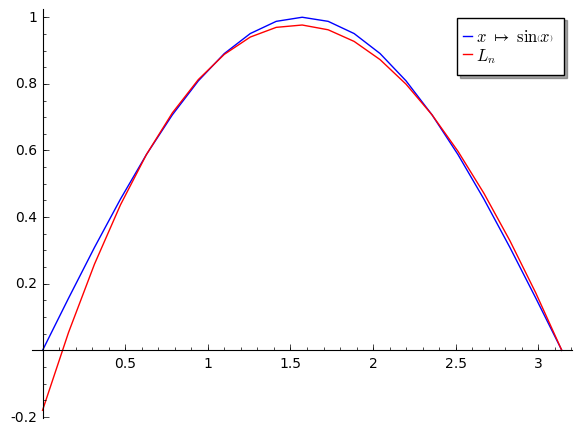

Function <script type="math/tex">x \ {\mapsto}\ \sin\left(x\right)</script> on <script type="math/tex">\left[0, \pi\right]</script> evaluated in <script type="math/tex">\left[\frac{1}{5} \, \pi, \frac{1}{3} \, \pi, 0.209158440005 \, \pi, 0.393668801149 \, \pi\right]</script>

,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


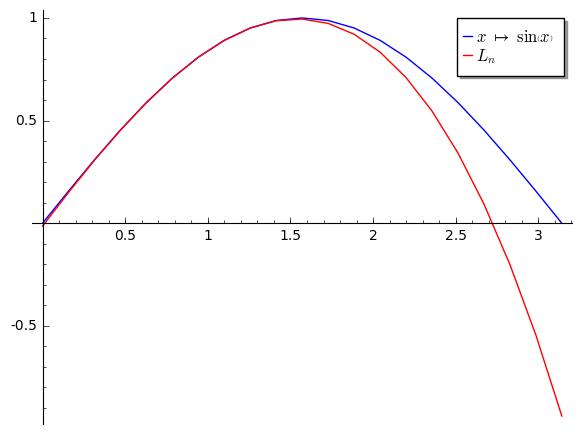

Function <script type="math/tex">x \ {\mapsto}\ \sin\left(x\right)</script> on <script type="math/tex">\left[0, \pi\right]</script> evaluated in <script type="math/tex">\left[\frac{3}{4} \, \pi, \pi, 0.849487681331 \, \pi, 0.78730705516 \, \pi\right]</script>

,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


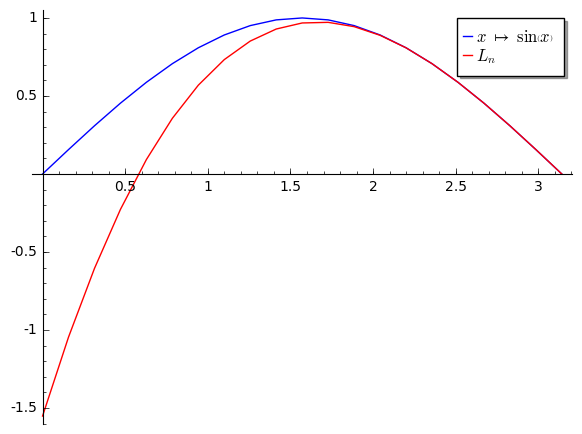

Function <script type="math/tex">x \ {\mapsto}\ \sin\left(x\right)</script> on <script type="math/tex">\left[0, \pi\right]</script> evaluated in <script type="math/tex">\left[\frac{7}{20} \, \pi, \frac{5}{12} \, \pi, \frac{5}{8} \, \pi, \frac{3}{4} \, \pi\right]</script>

,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


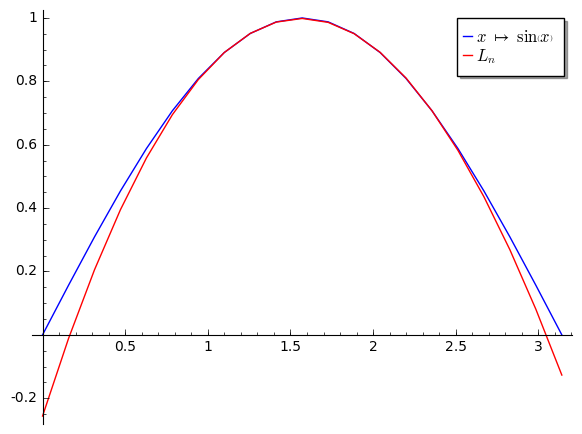

Function <script type="math/tex">x \ {\mapsto}\ \sin\left(x\right)</script> on <script type="math/tex">\left[0, \pi\right]</script> evaluated in <script type="math/tex">\left[\frac{1}{5} \, \pi, \frac{4}{15} \, \pi, \frac{1}{3} \, \pi, \frac{13}{24} \, \pi, \frac{3}{4} \, \pi, \frac{7}{8} \, \pi\right]</script>

,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,
,,,,


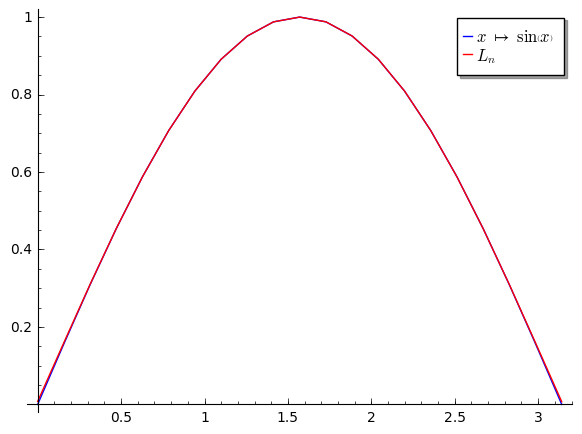

In [3]:
rank = 20
f(x) = sin(x)
I = [0, pi]
X_knot = [pi/5, pi/3, 3*pi/4, pi]
test_lagrange(f, X_knot, I, rank)

In [24]:
rank = 20
f(x) = sin(8*x)
I = [-1, 1]
X_knot = [-0.97, -0.69, -0.21, 0.33, 0.74, 0.95]
test_lagrange(f, X_knot, I, rank)

<html>Function <script type="math/tex">x \ {\mapsto}\ \sin\left(8 \, x\right)</script> on <script type="math/tex">\left[-1, 1\right]</script> evaluated in <script type="math/tex">\left[-0.970000000000000, -0.690000000000000, -0.210000000000000, 0.330000000000000, 0.740000000000000, 0.950000000000000\right]</script></html>
<html><div class="notruncate">
<table  class="table_form">
<tbody>
<tr>
<th><script type="math/tex">x_i</script></th>
<th><script type="math/tex">f(x_i)</script></th>
<th><script type="math/tex">L_n(x_i)</script></th>
<th><script type="math/tex">\left| f-L_n \right|</script></th>
<th><script type="math/tex">A</script></th>
</tr>
<tr class ="row-a">
<td><script type="math/tex">-1</script></td>
<td><script type="math/tex">-0.989358246623382</script></td>
<td><script type="math/tex">-1.76782903210338</script></td>
<td><script type="math/tex">0.778470785479999</script></td>
<td><script type="math/tex">12.0712700559360</script></td>
</tr>
<tr class ="row-b">
<td><script ty

<h2>Closeup of $\sin(8x)$ on $[-1,0]$</h2>

In [28]:
rank = 20
f(x) = sin(8*x)
I = [-1, 0]

pivot = sum(I)/2
scale = pivot - I[0] 
X_init = [-0.97, -0.69, -0.21, 0.33, 0.74, 0.95]
X_new = [x for x in X_init if x < pivot]
X_new += [I[0] + scale * random() for _ in range(len(X_init) - len(X_new))]

analyze_lagrange(f, X_new, I, rank)

<html>Function <script type="math/tex">x \ {\mapsto}\ \sin\left(8 \, x\right)</script> on <script type="math/tex">\left[-1, 0\right]</script> evaluated in <script type="math/tex">\left[-0.970000000000000, -0.690000000000000, -0.78546319013, -0.741138245299, -0.8173180592, -0.932294539111\right]</script></html>
<html><div class="notruncate">
<table  class="table_form">
<tbody>
<tr>
<th><script type="math/tex">x_i</script></th>
<th><script type="math/tex">f(x_i)</script></th>
<th><script type="math/tex">L_n(x_i)</script></th>
<th><script type="math/tex">\left| f-L_n \right|</script></th>
<th><script type="math/tex">A</script></th>
</tr>
<tr class ="row-a">
<td><script type="math/tex">-1</script></td>
<td><script type="math/tex">-0.989358246623382</script></td>
<td><script type="math/tex">-0.990421223972432</script></td>
<td><script type="math/tex">0.00106297734904992</script></td>
<td><script type="math/tex">0.00232583766300566</script></td>
</tr>
<tr class ="row-b">
<td><script type="ma